In [11]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import psutil

In [12]:
test_dir = '/kaggle/input/plantss/test'
model_path = '/kaggle/input/mobilenet/keras/default/1/mobilenetv2_plant_final.keras'
report_file = 'model_evaluation_report.txt'

In [13]:
test_data_generator = ImageDataGenerator(rescale=1.0/255)
test_dataset = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1000 images belonging to 10 classes.


In [14]:
model = tf.keras.models.load_model(model_path)

In [15]:
cpu_usage_list = []
ram_usage_list = []
inference_times = []

In [16]:
for i in range(5):
    start_time = time.time()
    cpu_before = psutil.cpu_percent(interval=None)
    ram_before = psutil.virtual_memory().used / (1024 ** 2)

    _ = model.predict(test_dataset)  # Run inference

    cpu_after = psutil.cpu_percent(interval=None)
    ram_after = psutil.virtual_memory().used / (1024 ** 2)
    end_time = time.time()

    inference_time = end_time - start_time
    cpu_usage = cpu_after - cpu_before
    ram_usage = ram_after - ram_before

    inference_times.append(inference_time)
    cpu_usage_list.append(cpu_usage)
    ram_usage_list.append(ram_usage)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [17]:
avg_inference_time = np.mean(inference_times)
avg_cpu_usage = np.mean(cpu_usage_list)
avg_ram_usage = np.mean(ram_usage_list)

loss, accuracy = model.evaluate(test_dataset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8535 - loss: 0.4581


In [18]:
results = [
    f'Test Accuracy: {accuracy * 100:.2f}%',
    f'Test Loss: {loss:.2f}',
    f'Average Inference Time (over 5 runs): {avg_inference_time:.4f} seconds',
    f'Average CPU Usage (over 5 runs): {avg_cpu_usage:.2f}%',
    f'Average RAM Usage Increase (over 5 runs): {avg_ram_usage:.2f} MB'
]

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


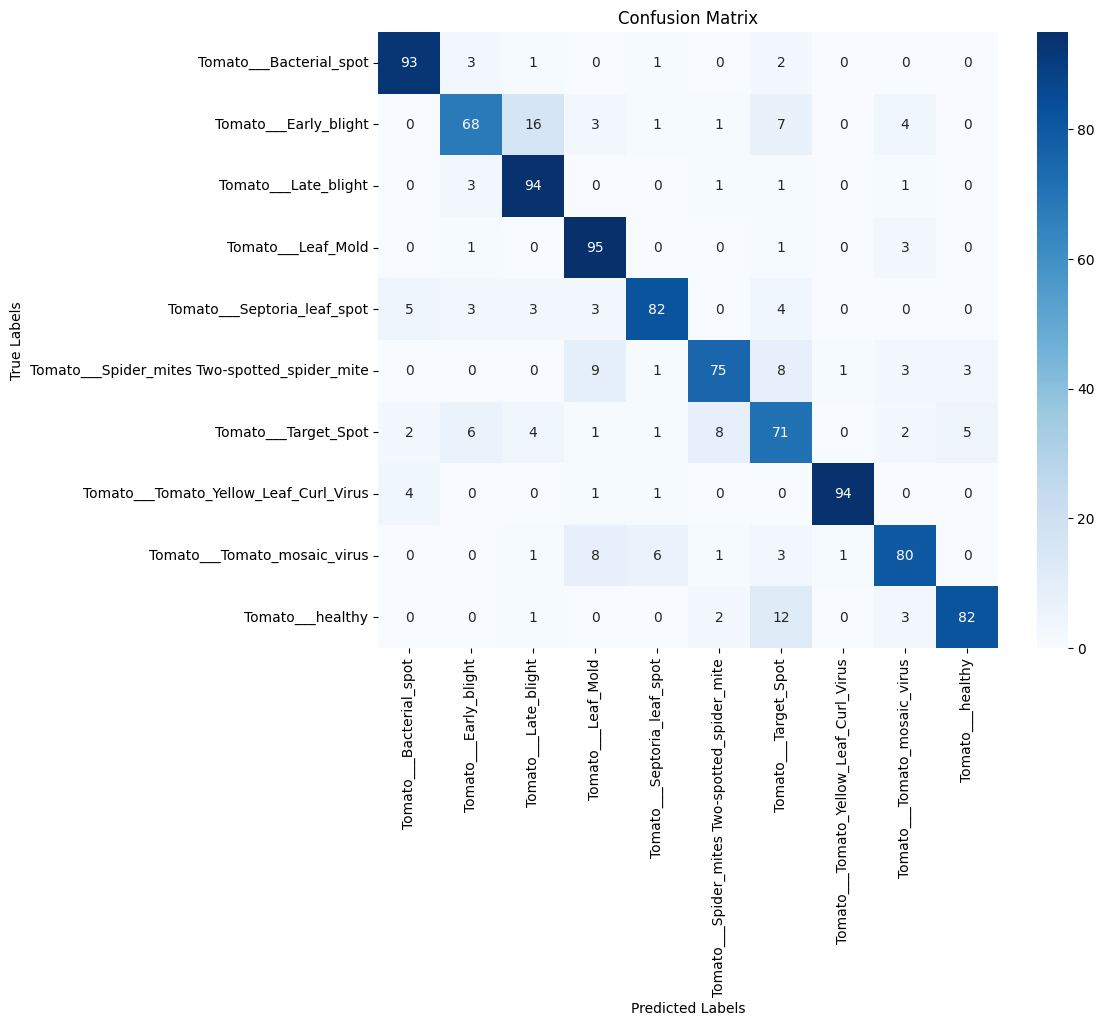

In [19]:
test_labels = test_dataset.classes
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=test_dataset.class_indices, yticklabels=test_dataset.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png')
plt.show()

report = classification_report(test_labels, predicted_labels, target_names=test_dataset.class_indices.keys())
results.append(f"\nClassification Report:\n{report}")

In [20]:
with open(report_file, 'w') as f:
    for line in results:
        f.write(line + '\n')

# Print the report
for line in results:
    print(line)

Test Accuracy: 83.40%
Test Loss: 0.51
Average Inference Time (over 5 runs): 3.0628 seconds
Average CPU Usage (over 5 runs): 7.66%
Average RAM Usage Increase (over 5 runs): 26.50 MB

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.89      0.93      0.91       100
                        Tomato___Early_blight       0.81      0.68      0.74       100
                         Tomato___Late_blight       0.78      0.94      0.85       100
                           Tomato___Leaf_Mold       0.79      0.95      0.86       100
                  Tomato___Septoria_leaf_spot       0.88      0.82      0.85       100
Tomato___Spider_mites Two-spotted_spider_mite       0.85      0.75      0.80       100
                         Tomato___Target_Spot       0.65      0.71      0.68       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.94      0.96       100
           